In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.svm import SVR

%cd C:\Users\user\Desktop\KUL - Mstat\Modern Data Analytics\proj\

C:\Users\user\Desktop\KUL - Mstat\Modern Data Analytics\proj


In [111]:
# import data
mortality = pd.read_csv('mortality_merged.csv')

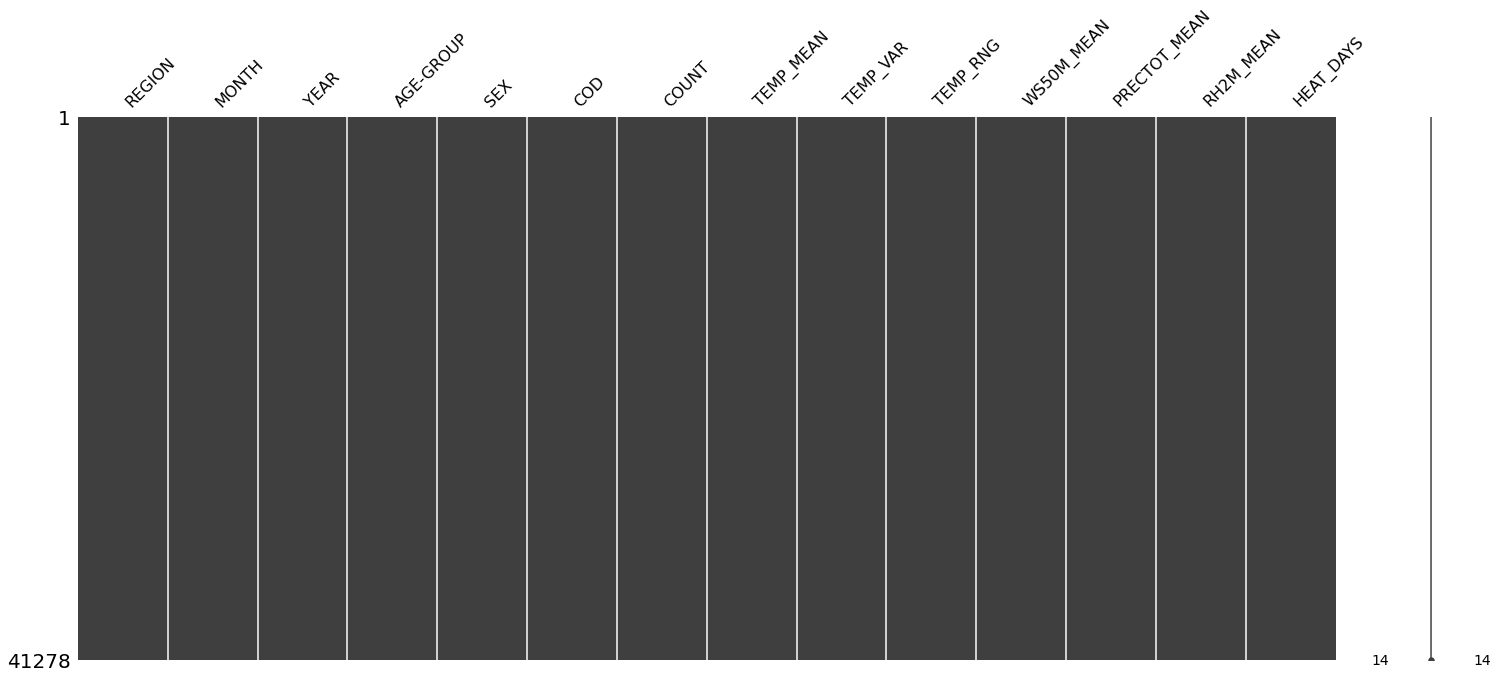

In [112]:
# Check for missing values, it seems alright
missingno.matrix(mortality)

In [113]:
# Summer period, comment it out if you want to do for the whole period
def get_summer(df):
    return df[(df['MONTH'] <= 8) & (df['MONTH'] >= 5)]
mortality = get_summer(mortality)

In [114]:
# Train-test split
TEST_SIZE = 0.1
SEED = 467051528
X_train, X_test, y_train, y_test = train_test_split(mortality.drop('COUNT', axis = 1), 
                                                    mortality['COUNT'], 
                                                    test_size = TEST_SIZE,
                                                    random_state = SEED,
                                                    shuffle = True)

In [115]:
# Preprocessing steps
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(drop = 'first')

categorical_features = ['REGION', 'AGE-GROUP', 'SEX', 'COD']
numeric_features = X_train.columns.drop(categorical_features)

preprocessor = ColumnTransformer(
    transformers = [
        ('drop_columns', 'drop', ['YEAR', 'MONTH']),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [116]:
# Parameter grids
deg = np.arange(3, 8)
gamma = np.arange(0.005, 0.10, 0.005)
C = np.arange(0.0, 4.0, 0.1)
epsilon = np.arange(0.01, 0.5, 0.05)
params = {'preprocessing__num' : [StandardScaler(), RobustScaler()], 
         'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'regressor__degree': deg, 
         'regressor__gamma': gamma,
         'regressor__C': C,
         'regressor__epsilon': epsilon}

In [117]:
# Model
model = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('regressor', SVR())
])

In [118]:
# Grid search
search = RandomizedSearchCV(model, 
                            param_distributions = params, 
                            random_state = SEED)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('drop_columns',
                                                                               'drop',
                                                                               ['YEAR',
                                                                                'MONTH']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['MONTH', 'YEAR', 'TEMP_MEAN', 'TEMP_VAR', 'TEMP_RNG', 'WS50M_MEAN',
       'PRECTOT_MEAN', 'RH2M_MEAN', 'HEAT_DAYS'],
      dtype='object')),
                                       

In [119]:
# Summary of grid search
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__kernel,param_regressor__gamma,param_regressor__epsilon,param_regressor__degree,param_regressor__C,param_preprocessing__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.519880,0.126601,0.899922,0.003783,sigmoid,0.09,0.11,4,2.8,RobustScaler(),"{'regressor__kernel': 'sigmoid', 'regressor__g...",-6.796379,-1.005439,-1.407875,-1.081703,-1.066901,-2.271659,2.266714,10
1,4.324303,0.022776,0.865047,0.004030,sigmoid,0.01,0.46,5,2.9,StandardScaler(),"{'regressor__kernel': 'sigmoid', 'regressor__g...",0.088134,0.072289,0.099731,0.078249,0.081629,0.084006,0.009385,7
2,4.458240,0.036086,2.297494,0.009860,rbf,0.065,0.26,3,3.6,RobustScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.287879,0.269535,0.308954,0.277153,0.286869,0.286078,0.013270,1
3,4.352174,0.035775,2.272522,0.013023,rbf,0.03,0.41,4,2.3,StandardScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.176064,0.154721,0.185828,0.163152,0.167883,0.169530,0.010687,5
4,4.493018,0.017775,0.894040,0.001897,sigmoid,0.03,0.21,3,0.4,StandardScaler(),"{'regressor__kernel': 'sigmoid', 'regressor__g...",0.011979,0.002336,0.022204,0.009475,0.010273,0.011254,0.006389,8
5,3.438554,0.028505,0.642671,0.006225,poly,0.055,0.46,6,1.9,RobustScaler(),"{'regressor__kernel': 'poly', 'regressor__gamm...",-0.109337,-0.116358,-0.115716,-0.110606,-0.113132,-0.113030,0.002750,9
6,4.505653,0.022186,2.367612,0.010555,rbf,0.045,0.11,5,2,RobustScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.206166,0.190055,0.223782,0.196517,0.205204,0.204345,0.011378,4
7,4.606078,0.092583,2.405140,0.005751,rbf,0.015,0.01,7,2.3,RobustScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.148072,0.132154,0.163085,0.137047,0.143115,0.144695,0.010657,6
8,4.655025,0.022007,2.388530,0.004862,rbf,0.085,0.06,7,3,StandardScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.225235,0.204160,0.236399,0.213919,0.219167,0.219776,0.010814,3
9,3.758846,0.031259,0.591396,0.005215,linear,0.025,0.11,4,2,StandardScaler(),"{'regressor__kernel': 'linear', 'regressor__ga...",0.273798,0.241868,0.286526,0.243296,0.260606,0.261219,0.017290,2


In [120]:
# Best fitted scores
print(search.best_params_)
print('Best scores: ', search.best_score_)

{'regressor__kernel': 'rbf', 'regressor__gamma': 0.065, 'regressor__epsilon': 0.26, 'regressor__degree': 3, 'regressor__C': 3.6, 'preprocessing__num': RobustScaler()}
Best scores:  0.2860779769984574


In [121]:
# Test performance
model_chosen = search.best_estimator_
y_pred = model_chosen.predict(X_test)

In [122]:
# Test loss
mean_squared_error(y_pred, y_test)

1532.3309583001535

In [123]:
# Training loss
mean_squared_error(y_train, model_chosen.predict(X_train))

1340.3455940180982

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


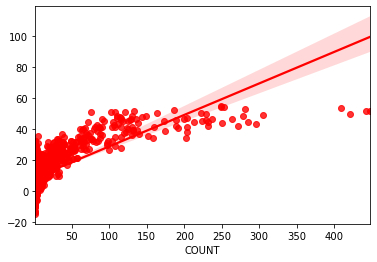

In [124]:
sns.regplot(y_test, y_pred, color = 'red')

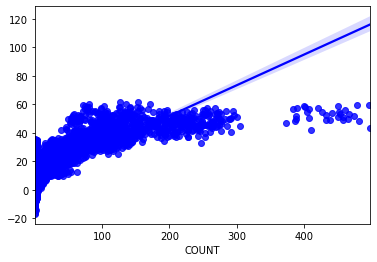

In [125]:
sns.regplot(x = y_train, y = model_chosen.predict(X_train), color = 'blue')